#  Определение тарифа для телеком компании

В нашем распоряжении данные 500 пользователей оператора "Мегалайн" за 2018 год.

**Цель исследования** - установить какой из тарифов является наиболее прибыльным и проверить две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Задачи исследования** - для выполнения поставленной цели мы проверим несколько датасетов на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы сгруппируем и объединим датасеты для анализа. Далее мы рассчитаем и проанализируем параметры, которые помогут проверить установленные гипотезы. Также, нам нужно будет сравнить среднюю выручку по тарифам в Москве с остальными регионами.

**Ход исследования**

Нам необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Данная информация находится в пяти датасетах:

1. Данные о звонках пользователей содержатся в датасете `/datasets/calls.csv`;
2. Данные о пользовании интернетом пользователей содержатся в датасете `/datasets/internet.csv`;
3. Данные о сообщениях пользователей содержатся в датасете `/datasets/messages.csv`;
4. Данные об используемом тарифе содержатся в датасете `/datasets/tariffs.csv`;
5. Данные о местонахождении пользователей содержатся в датасете `/datasets/users.csv`.

Мы проверим данные на ошибки, объединим их в общий датафрейм и проведем статистическую оценку данной выборки. Все это нужно для того чтобы проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ и описание данных.
 4. Проверка гипотез.


## Изучение общей информации

Составим первое представление о данных. Импортируем библиотеку pandas и остальные библиотеки для проведения анализа, сохраним файлы в переменные `df` и выведем первые 5 строк таблицы методом `.head`

In [1]:
import pandas as pd
import math 
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #импортируем библиотеку numpy
from math import ceil
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Итак, у нас есть информация о дате звонка, его длительности и пользователе который его совершил. Одной командой получим общую информацию о таблице.

In [2]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Всего в датасете `df_calls` 202 607 строк с различным типом данных `float`, `int`, `object`. Пропущенных значений нет. 

Взглянем на датасет с информацией об интернете `df_internet`.

In [3]:
df_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Здесь у нас есть информация о количестве использованного интернета в мегабайтах, периоде использования интернета и пользователе который его совершил. Каждая сессия имеет свой идентификационный номер. Одной командой получим общую информацию о таблице.

In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Всего в датасете `df_internet` 149 396 строк с различным типом данных `float`, `int`, `object`.
Пропущенных значений нет.
Взглянем на датасет с информацией об сообщениях `df_messages`.

In [5]:
df_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Здесь у нас есть информация о количестве отправленных смс, дате их отправки и пользователе который его совершил. Каждое сообщение имеет свой идентификационный номер. Одной командой получим общую информацию о таблице.

In [6]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Всего в датасете `df_messages` 123 036 строк с различным типом данных `float`, `int`, `object`.
Пропущенных значений нет.
Взглянем на датасет с информацией о пользователях `df_users`.

In [7]:
df_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Здесь у нас есть информация о самом пользователе: его идентификационный номер, возраст, дата прекращения пользования тарифом, город пребывания, имя и фамилия, дата подключения тарифа и название тарифного плана. Одной командой получим общую информацию о таблице.

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Всего в датасете `df_users` 500 строк с типом данных `int`, `object`. Пропущенные значения имеются в дате прекращения пользования тарифом, что значит клиент на момент выгрузки данных еще пользовался тарифом. Всего мы имеем данные о 500 пользователях для изучения.
Взглянем на датасет с информацией о тарифах `df_tariffs`.

In [9]:
df_tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Здесь мы имеем просто информацию о самих тарифах, а имено пакет услуг, предлагаемый в тарифе, его абонентская плата и стоимость услуг сверх пакета, установленного тарифом. 
Еще раз взглянем на количество строк в каждом датасете.

In [10]:
print('Количество строк в df_users',df_users['user_id'].count())
print('Количество строк в df_messages',df_messages['user_id'].count())
print('Количество строк в df_calls',df_calls['user_id'].count())
print('Количество строк в df_internet',df_internet['user_id'].count())


Количество строк в df_users 500
Количество строк в df_messages 123036
Количество строк в df_calls 202607
Количество строк в df_internet 149396


Исходя из полученной информации мы видим, что 500 пользователей чаще пользуются звонками, реже - интернетом и гораздо реже смс-сообщениями.

**Вывод**

В каждой строке таблицы — данные о пользователях оператора «Мегалайн», а именно:  кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за определенный промежуток времени.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Однако, для дальнейшего анализа необходимо привести данные к общему типу и проверить данные на предмет ошибок.

## Предобработка данных

### Исследование пропусков и нулевых значений

В примечании указано, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
В данных звонки указаны в дробных значениях, поэтому округлим их до целых чисел в большую сторону.

In [11]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Взглянем на данные в столбце "duration" при помощи `.describe`  и выявим медиану.

In [12]:
print('Медиана в длительности звонков равна', df_calls['duration'].median(), 'мин.')
df_calls['duration'].describe()

Медиана в длительности звонков равна 6.0 мин.


count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Мы видим что в среднем пользователи разговаривают 6 минут. Среднее превышает медиану, что значит датасет имеет скошееность вправо, проиллюстрируем это на графике. 

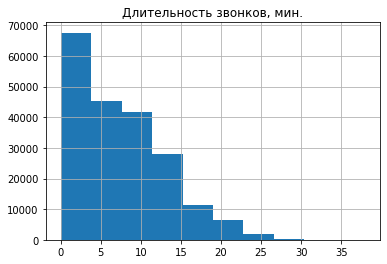

In [13]:
df_calls['duration'].hist()
plt.title('Длительность звонков, мин.');

По графику видно что явных аномалий нет и мы имеем дело с  датасетом с положительной скошенностью. Также можно заметить, что в датасете есть внушительное количество звонков с нулевой продолжительностью - это пропущенные звонки, проверим, есть ли нулевые значения в использовании интернета.

In [14]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Мы видим, что и при использовании интеренета есть нулевые сессии, взглянем на график, чтобы понять количество таких сессий.

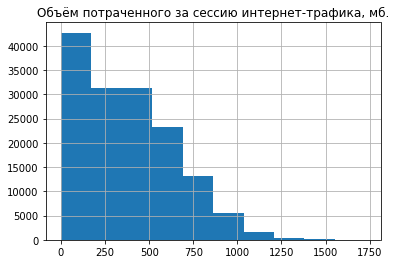

In [15]:
df_internet['mb_used'].hist()
plt.title('Объём потраченного за сессию интернет-трафика, мб.');

Объем переваливает за 40 000 сессий. Но в целом можно утверждать, что явных аномалий в датасете нет. По аналогии со звонками датасет также скошен в право.

### Замена типа данных

Ранее мы обнаружили, что у нас разнородный тип данных в датафреймах. В первую очередь необходимо перевести столбцы с датами в формат данных `datetime64`, а затем - столбцы с числами из `object` в `int`.

In [16]:
#преобразования в датафрейме df_calls
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
df_calls['id'] = df_calls['id'].astype(int)

#преобразования в датафрейме df_internet
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
df_internet['id'] = df_internet['id'].astype(int)

#преобразования в датафрейме df_messages
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
df_messages['id'] = df_messages['id'].astype(int)

#преобразования в датафрейме df_users
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

Далее для того чтобы объединить подготовленные датафрейме, нам необходимо определить главный признак объединения - id пользователя, однако этого недостаточно для структуризации, поэтому дополнительно будем объединять по месяцу пользования услугой. В наших датасетах есть только даты - переведем их в новый формат. Для этого создадим в каждом датасете новый столбец "month" и выполним преобразования, используя `.dt.month`. 

In [17]:
#создаем новый столбец "month" в каждом датафрейме

df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month

### Подготовка пользовательских данных

Итак, мы приведи данные к нужному типу и теперь готовы объединять полученные датафреймы. Однако, в наших датафреймах находятся данные о каждом дне отдельно. Поэтому, предварительно нам нужно сгруппировать каждый датафрйем по пользователю и месяцу, используя `.groupby` и просуммировать  каждый параметр с помощью `.agg`. 

In [18]:
#группируем "df_calls" по user_id и month 
df_calls = (df_calls.groupby(['user_id', 'month'])
            .agg({'duration': 'sum','id': 'count'}). # суммируем длительность звонков и их количество
            rename(columns={'id':'calls'}).reset_index() # переименовываем столбец "id"
           )

#группируем "df_internet" по user_id и month 
df_internet = (df_internet.groupby(['user_id', 'month'])
               .agg({'mb_used': 'sum'}).reset_index()
              )
               
 #группируем "df_messages" по user_id и month              
df_messages = (df_messages.groupby(['user_id', 'month'])
               .agg({'id': 'count'})
               .rename(columns={'id':'messages'}).reset_index()
              )

Группировки выполнены. Прежде чем приступать к объединению, добавим еще один параметр в таблицу об использованных гигабайтах, поскольку тарификация осуществляется по гигабайтам, а в нашем датасете информация по мегабайтам.
В примечании указано, что «Мегалайн» всегда округляет мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. На 1 гб приходится 1024 мб.Используем это при расчете.

In [19]:
# создаем новый столбец "mb_to_pay" с окргулением до мегабайтов, которые будут оплачены пользователем
df_internet['mb_to_pay'] = (df_internet['mb_used']/1024).apply(math.ceil)*1024

Далее, можем приступить к созданию единого датафрейма при помощи метода `.merge`. Поскольку некотрыми услугами (например смс) пользователь мог не пользоваться вообще, при объединении у нас могут появится пустые значения. Заменим пропуски на ноль.

In [20]:
#объединяем df_calls, df_internet и df_messages по двум парметрам "user_id" и "month"
report = (df_calls.merge(df_internet, on = ['user_id', 'month'],how = 'outer')
          .merge(df_messages, on = ['user_id', 'month'], how = 'outer')
          .fillna(0)
         )

#добавляем к объединению df_users и df_tariffs
report = (report.merge(df_users, on = 'user_id', how = 'left')
          .merge(df_tariffs,left_on = 'tariff',right_on = 'tariff_name', how = 'left')
         )

display(report.head())

,user_id,month,duration,calls,mb_used,mb_to_pay,messages,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2253.49,3072.0,22.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,23233.77,23552.0,60.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,14003.64,14336.0,75.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,14055.93,14336.0,81.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,14568.91,15360.0,57.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


Таким образом мы получили полный датасет, который можем использовать для анализа данных. Для того, чтобы понять какой тариф приносит больше денег компании, нам не хватает расчета одного показателя - выручки. Создадим функцию, которая будет вычитать бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика и умножать остаток на стоимость услуг сверх тарифного пакета. В случае если остатка не будет, то в сумму выручки будет включена только абонентская плата.

In [21]:
def revenue_per_user(row):
    # считаем потенциальную выручку
    minutes_revenue = (row['duration'] - row['minutes_included']) *  row['rub_per_minute']
    messages_revenue = (row['messages'] - row['messages_included']) *  row['rub_per_message']
    internet_revenue = (row['mb_to_pay'] - row['mb_per_month_included'])/1024 * row['rub_per_gb']
    # убираем отрицательные значения
    if minutes_revenue < 0: minutes_revenue = 0
    if messages_revenue < 0: messages_revenue = 0
    if internet_revenue < 0: internet_revenue = 0
        
    return minutes_revenue + messages_revenue + internet_revenue + row['rub_monthly_fee']


report['revenue'] = report.apply(revenue_per_user, axis = 1)

In [22]:
display(report.head())


,user_id,month,duration,calls,mb_used,mb_to_pay,messages,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,5,159.0,22.0,2253.49,3072.0,22.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6,172.0,43.0,23233.77,23552.0,60.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7,340.0,47.0,14003.64,14336.0,75.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8,408.0,52.0,14055.93,14336.0,81.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9,466.0,58.0,14568.91,15360.0,57.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


**Вывод**

Таким образом, мы обработали каждый датафрейм, добавили недостающие параметры и создали общий датасет, который мы можем анализировать и проверять гипотезы.

## Анализ и описание данных

Для того что определить какой тариф прибыльнее для компании, выведем статистики для звонков, сообщений, использованных мегабайт и выручки с помощью `.describe`. Также построим графие выручки через `.distplot`.

Статистика для тарифа  ultra :


,count,mean,std,min,25%,50%,75%,max
duration,985.00,526.62,317.61,0.00,284.00,518.00,752.00,1673.00
mb_used,985.00,19468.81,10087.17,0.00,11770.26,19308.01,26837.69,49745.69
messages,985.00,49.36,47.80,0.00,6.00,38.00,79.00,224.00
revenue,985.00,2070.15,376.19,1950.00,1950.00,1950.00,1950.00,4800.00


Статистика для тарифа  smart :


,count,mean,std,min,25%,50%,75%,max
duration,2229.00,417.93,190.31,0.00,282.00,422.00,545.00,1435.00
mb_used,2229.00,16208.39,5870.48,0.00,12643.01,16506.84,20042.93,38552.45
messages,2229.00,33.38,28.23,0.00,10.00,28.00,51.00,143.00
revenue,2229.00,1289.97,818.40,550.00,550.00,1023.00,1750.00,6770.00


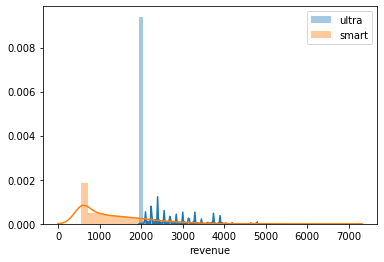

In [23]:
for tariff in report['tariff'].unique():
    table =  report.query('tariff == @tariff')
    print('Статистика для тарифа ', tariff, ':')
    # T отвечает за транспонированную таблицу
    display(table[['duration', 'mb_used', 'messages', 'revenue']].describe().T.style.format('{:.2f}'))
    sns.distplot(table['revenue'], label = tariff)
plt.legend();    

Судя по полученным средним выручки мы можем определить, что средний пользователь тарифа "Ультра" приносит больше денег оператору, нежели средний пользователь тарифа "Смарт". НО судя по стандратным отклонениям и полученному графику мы видим, что пользователи "Смарт" склонны чаще выходить за пределы лимита (более высокое стандартное отклонение говорит о большем разбросе данных).

В целом, мы видим, что пользователи тарифа "Ультра" тратят больше минут, сообщений и мегабайт, но сопоставимо ли это с полным пакетом услуг? Построим графики по каждому параметру, чтобы это определить. 

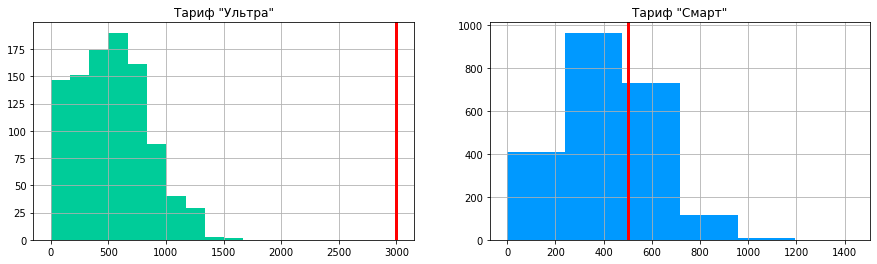

В тарифе Ультра 0 пользователей выходят за рамки лимита минут.
В тарифе Смарт 754 пользователей выходят за рамки лимита минут.


In [24]:
#разделим датасет по тарифам, используя метод `.query`
df_ultra = report.query('tariff == "ultra"')
df_smart = report.query('tariff == "smart"')

parameter = ['duration']
lim_ultra = df_ultra['minutes_included'].mean()
lim_smart = df_smart['minutes_included'].mean()

for title in parameter:
    myhex = '#00CC99' #параметр задающий  цвет
    fig, axes = plt.subplots(1,2, figsize=(15,4)) #параметр, располагающий 2 графика в одной плоскости
    df_ultra[title].hist(bins=10, ax=axes[0], color=myhex)#строим гистограмму для тарифа Ультра
    axes[0].axvline(x=lim_ultra, ymin=0, ymax=600, linewidth = 3, color ='red')#рисуем красную линию лимита
    axes[0].set_title('Тариф "Ультра"')#устанавливаем название тарифа
        
    myhex = '#0099FF'
    df_smart[title].hist(bins=6, ax=axes[1], color=myhex)#строим гистограмму для тарифа Смарт
    axes[1].set_title('Тариф "Смарт"')#устанавливаем название тарифа
    axes[1].axvline(x=lim_smart, ymin=0, ymax=600, linewidth = 3, color ='red')#рисуем красную линию лимита
    plt.show();
    
    print('В тарифе Ультра', df_ultra.query('duration> @lim_ultra').shape[0] , 'пользователей выходят за рамки лимита минут.')
    print('В тарифе Смарт', df_smart.query('duration>@lim_smart').shape[0] , 'пользователей выходят за рамки лимита минут.')   

Таким образом мы видим, что пользователи тарифа "Ультра" никогда не выходят за пределы включенных в тариф минут, в то время как треть пользователей тарифа "Смарт" выходят за пределы пакета, тем самым принося дополнительный доход компании.

Посмотрим, повторяется ли тенденция в использовании сообщений.

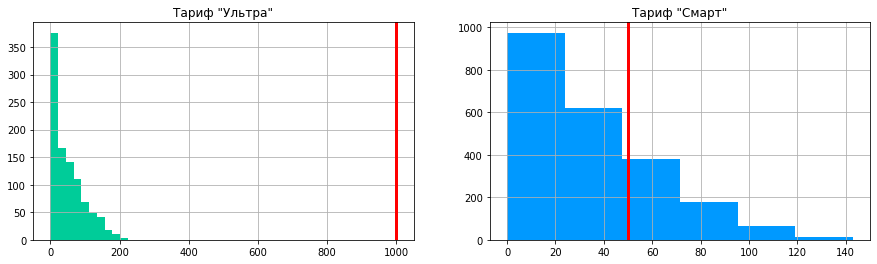

В тарифе Ультра 0 пользователей выходят за рамки лимита сообщений.
В тарифе Смарт 564 пользователей выходят за рамки лимита сообщений.


In [25]:
parameter = ['messages']
lim_ultra = df_ultra['messages_included'].mean()
lim_smart = df_smart['messages_included'].mean()

for title in parameter:
    myhex = '#00CC99' #параметр задающий  цвет
    fig, axes = plt.subplots(1,2, figsize=(15,4)) #параметр, располагающий 2 графика в одной плоскости
    df_ultra[title].hist(bins=10, ax=axes[0], color=myhex)#строим гистограмму для тарифа Ультра
    axes[0].axvline(x=lim_ultra, ymin=0, ymax=600, linewidth = 3, color ='red')
    axes[0].set_title('Тариф "Ультра"')#устанавливаем название тарифа
    
    
    myhex = '#0099FF'
    df_smart[title].hist(bins=6, ax=axes[1], color=myhex)#строим гистограмму для тарифа Смарт
    axes[1].set_title('Тариф "Смарт"')#устанавливаем название тарифа
    axes[1].axvline(x=lim_smart, ymin=0, ymax=600, linewidth = 3, color ='red')
    
    plt.show();
    
    print('В тарифе Ультра', df_ultra.query('messages> @lim_ultra').shape[0] , 'пользователей выходят за рамки лимита сообщений.')
    print('В тарифе Смарт', df_smart.query('messages>@lim_smart').shape[0] , 'пользователей выходят за рамки лимита сообщений.')

Судя по графику, аналогично использованным минутам, сообщения в тарифе "Ультра" находятся на далеком уровне от предела, в то время как четверть пользователей тарифа "Смарт" выходят за рамки лимита.

Пронализируем использование интернета   этим же способом.

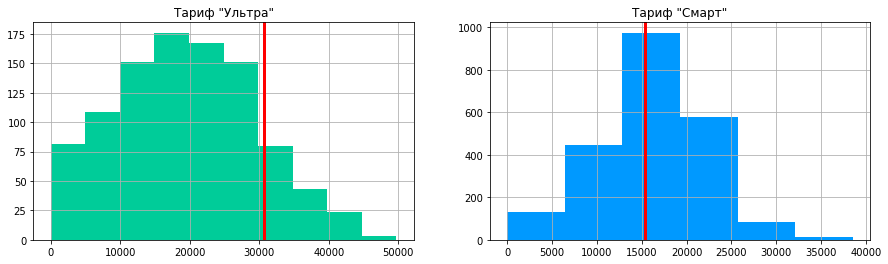

В тарифе Ультра 134 пользователей выходят за рамки лимита мегабайт.
В тарифе Смарт 1304 пользователей выходят за рамки лимита мегабайт.


In [26]:
parameter = ['mb_used']
lim_ultra = df_ultra['mb_per_month_included'].mean()
lim_smart = df_smart['mb_per_month_included'].mean()

for title in parameter:
    myhex = '#00CC99' #параметр задающий  цвет
    fig, axes = plt.subplots(1,2, figsize=(15,4)) #параметр, располагающий 2 графика в одной плоскости
    df_ultra[title].hist(bins=10, ax=axes[0], color=myhex)#строим гистограмму для тарифа Ультра
    axes[0].axvline(x=lim_ultra, ymin=0, ymax=600, linewidth = 3, color ='red')
    axes[0].set_title('Тариф "Ультра"')#устанавливаем название тарифа
    
    
    myhex = '#0099FF'
    df_smart[title].hist(bins=6, ax=axes[1], color=myhex)#строим гистограмму для тарифа Смарт
    axes[1].set_title('Тариф "Смарт"')#устанавливаем название тарифа
    axes[1].axvline(x=lim_smart, ymin=0, ymax=600, linewidth = 3, color ='red')
    
    plt.show();
    
    print('В тарифе Ультра', df_ultra.query('mb_used> @lim_ultra').shape[0] , 'пользователей выходят за рамки лимита мегабайт.')
    print('В тарифе Смарт', df_smart.query('mb_used>@lim_smart').shape[0] , 'пользователей выходят за рамки лимита мегабайт.')

В отличии от предыдущих параметров, использование интернет-трафика превышается как у пользователей "Ультра", так и у пользователей "Смарт". Но конечно, у пользователей последнего тенденция выходить за рамки пакета около 50%, в то время как у пользователей "Ультра" всего 15%. 

**Вывод**

По первому взгляду на средние мы определили, что наиболее выгодным тарифом для компании является тариф "Ультра", однако из-за высокой стоиомсти лишь треть пользователей пользуется данным тарифом, в то время как "Смарт" является наиболее популярным тарифом и в сумме приносит больше денег компании из-за большего количества абонентов, а также дополнительного дохода от превышения абонентами пакета включенных в тариф услуг.

Для того чтобы убедить в правильности сделанного вывода, проверим гипотезы о неравенстве средних совокупностей двух тарифов.

## 4.  Проверка гипотез и пояснения

На данном этапе наша цель проверить две гипотезы:

1. Средняя выручка тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов.

Начнем с первой гипотезы. Установим нулевую гипотезу о равенстве средних двух совокупностей и противопоставим ей альтрнативную гипотезу:

H₀: Средняя выручка тарифа «Ультра» равна средней выручке тарифа «Смарт»;\
H₁: Средняя выручка тарифа «Ультра» не равна средней выручке тарифа «Смарт».

Для проверки нулевой и альтернативной гипотезы нам необходимо установить критический уровень и определить равенство дисперсий в двух совокупностях.\
Критические значения задаются выбранным уровнем значимости проверки гипотезы. Уровень значимости — это суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего. Предположим, что допустимая вероятность этого - 5%.\
Касательно дисперсий воспользуемся методом `.var`, который поможет нам установить равны дисперсии изучаемых выборок или нет. 

In [27]:
smart_var = np.var(df_smart['revenue'])
ultra_var = np.var(df_ultra['revenue'])

if smart_var == ultra_var: print('Дисперсии выборок равны.')
else: print('Дисперсии выборок не равны.')     

Дисперсии выборок не равны.


Мы получили всю необходимую информацию и теперь можем провести t-тест. Применим метод scipy.stats.ttest_ind() и передадим ему следующие параметры: массивы, содержащие выборки выручки каждого тарифа отдельно; equal_var=False, т.к. мы установили что дисперсии не равны.

In [28]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_smart['revenue'],df_ultra['revenue'], equal_var = False)
# equal_var - считать ли равными дисперсии выборок

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу.


Благодаря t-тесту мы установили что средняя выручка тарифа «Ультра» не равна средней выручке тарифа «Смарт», что подтверждает правильность выводов предыдущего пункта.

Далее, установим нулевую и альтернативную гипотезы о равенстве средней выручки оператора в Москве и остальных регионов:

H₀: Средняя выручка от пользователей из Москвы равна выручке пользователей из других регионов;\
H₁: Средняя выручка от пользователей из Москвы не равна выручке пользователей из других регионов.

Сначала определим равенство дисперсий, а затем проведем t-тест по аналогии с предыдущей гипотезой.

In [29]:
#разделим датасет на Москву и другие регионы, используя метод `.query`
moscow = report.query('city == "Москва"')
regions = report.query('city != "Москва"')

moscow_var = np.var(moscow['revenue'])
regions_var = np.var(regions['revenue'])

if moscow_var == regions_var: print('Дисперсии выборок равны.')
else: print('Дисперсии выборок не равны.')   

Дисперсии выборок не равны.


In [30]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(moscow['revenue'],regions['revenue'], equal_var = False)
# equal_var - считать ли равными дисперсии выборок

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу.


Таким образом, мы определили, что в среднем пользователи Москвы тратят столько же денег на пользованиями услугами "Мегалайн" сколько тратят пользователи в регионах.

**Вывод**

Мы установили нулевую и альтернативную гипотезы для каждого вопроса и разделили датафрейм на две выборки по каждому вопросу отдельно. Затем чтобы проверить гипотезы о равенстве среднего двух выборок, мы применили метод scipy.stats.ttest_ind().

## 5. Общий вывод

Мы получили данные 500 пользователей оператора "Мегалайн" за 2018 год. С помощью предобработки данных  мы сгруппировали и объединили датасеты для анализа и смогли обработать полученный датасет. Далее мы рассчитали показатели выручки и провели исследовательский анализ данных. Это помогло нам проанализировать поведение клиентов и определить что наиболее прибыльный тариф для оператора - тариф "Ультра". Однако нам понадобилось проверить достоверность этого анализа с помощью проверки статистических гипотез. Благодаря этой проверке мы проверили две гипотезы и установили:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 

Первая гипотеза полностью подтвердилась.

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Таким образом, вторая гипотеза не подтвердилась. Однако, из данных только 500 пользователей не всегда можно сделать вывод о всех пользователях оператора "Мегалайн". Проверки статистических гипотез показали, насколько они достоверны, исходя из имеющихся данных.
